<a href="https://colab.research.google.com/github/KwonYN/Algorithm_Practice/blob/master/PYTHON/TENSORFLOW2/02_05_custom_file_handling_7_kyn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 실습 2-5: Image data preprocessing

## Module import

In [0]:
%tensorflow_version 2.x

import tensorflow as tf

import IPython.display as display
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

print("Module Loaded.")
print("TensorFlow Version :{}".format(tf.__version__))
print("NumPy Version :{}".format(np.__version__))
print("Matplotlib Version :{}".format(plt.matplotlib.__version__))

# set auto tune
AUTOTUNE = tf.data.experimental.AUTOTUNE

TensorFlow 2.x selected.
Module Loaded.
TensorFlow Version :2.0.0
NumPy Version :1.17.4
Matplotlib Version :3.1.2


## 0 Utility functions define

### 1.1 ploting function

In [0]:
# tf.keras.preprocessing.image.ImageDataGenerator()가 생성한 결과의 일부를 확인

def show_batch(data_gen, class_l):
  # get image and label from data generator
  img_batch, l_batch = next(data_gen) 
  plt.figure(figsize=(10,10))
  for n in range(25):
    ax = plt.subplot(5,5,n+1)
    plt.imshow(img_batch[n])
    plt.title(class_l[l_batch[n]==1][0].title())
    plt.axis('off')
  return img_batch, l_batch

### 1.2 check images

In [0]:
# 지정 폴더 아래에 있는 모든 *.jpg 파일의 수 및 폴더명 목록을 리턴
# pathlib 라이브러리 내의 클래스 Path - 의 메소드 glob() 

def check_dir(d_path):
  img_count = len(list(d_path.glob('*/*.jpg')))
  c_name = np.array([item.name for item in d_path.glob('*') if item.name != "LICENSE.txt"])
  return img_count, c_name

In [0]:
# 지정 path 아래에 있는 폴더에서 이미지 두장씩을 확인

def check_image(d_path, class_list):
  for i in range(len(class_list)):
    class_temp = list(d_path.glob(str(class_list[i])+'/*'))
    for image_path in class_temp[:2]:
      display.display(Image.open(str(image_path)))

## 1 마운트된 G-drive에서 압축된 zip파일을 복사해 와서 처리하기

### 1.0 G-drive mount

In [0]:
# Data size가 클때는 옮겨와서 처리하는 것이 좋음
# *Google* drive mount
from google.colab import drive
drive.mount('/content/drive')

cwd = os.getcwd() # 현재 위치 

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


### 1.1 unzip the file

In [0]:
# check the images have been extracted
# extract images on colab drive
!tar -xf /content/drive/Shared\ drives/scsa_2019_e/z_data/flower_photos.tgz

In [0]:
!ls -al flower_photos/ #폴더에 있는 파일목록 확인 => /content/flower_phtots (drive 말고)

total 624
drwxr-x--- 7 270850 5000   4096 Feb 10  2016 .
drwxr-xr-x 1 root   root   4096 Dec 10 03:43 ..
drwx------ 2 270850 5000  36864 Feb 10  2016 daisy
drwx------ 2 270850 5000  49152 Feb 10  2016 dandelion
-rw-r----- 1 270850 5000 418049 Feb  9  2016 LICENSE.txt
drwx------ 2 270850 5000  36864 Feb 10  2016 roses
drwx------ 2 270850 5000  36864 Feb 10  2016 sunflowers
drwx------ 2 270850 5000  49152 Feb 10  2016 tulips


### 1.2 check images

In [0]:
# check_dir()을 사용할 수 있도록 준비
import pathlib

# set data_dir : "/content"가 나의 colab의 시작
data_dir_cwd = pathlib.Path('/content/flower_photos')
print(data_dir_cwd, type(data_dir_cwd))

/content/flower_photos <class 'pathlib.PosixPath'>


In [0]:
# check_dir()로 폴더명과 이미지 숫자 확인
image_count_cwd, CLASS_NAMES_cwd = check_dir(data_dir_cwd)

print('image_count: {}\nclasses: {}'.format(image_count_cwd, CLASS_NAMES_cwd))

image_count: 3670
classes: ['dandelion' 'daisy' 'roses' 'tulips' 'sunflowers']


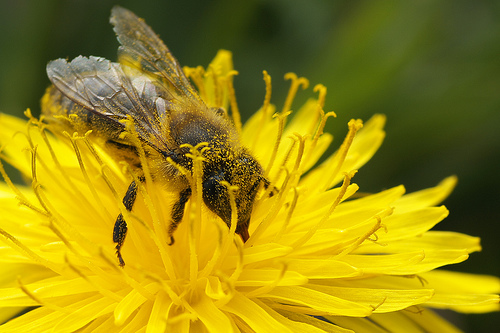

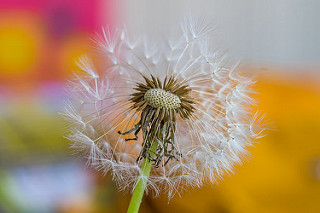

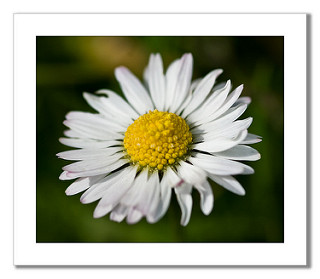

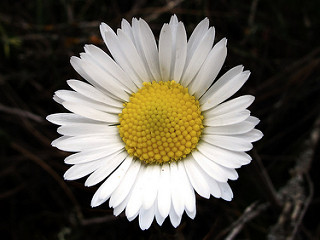

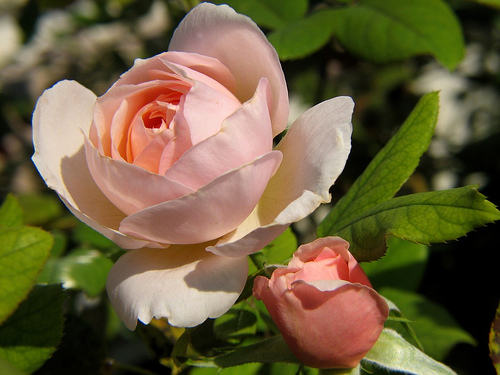

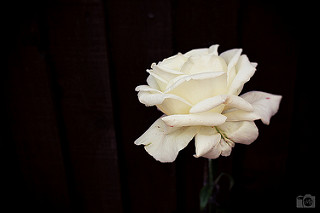

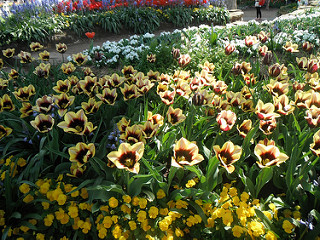

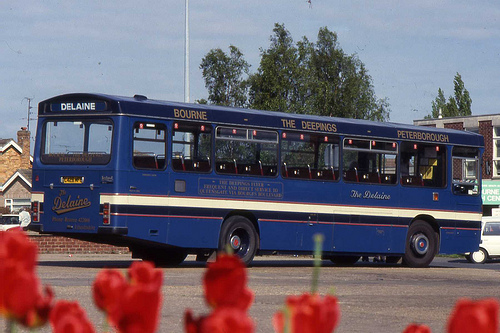

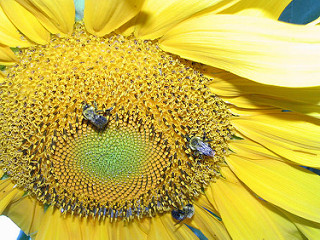

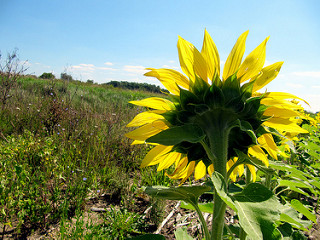

In [0]:
# check_image()로 이미지 두장씩 확인 
check_image(data_dir_cwd, CLASS_NAMES_cwd)

### 1.3 `ImageDataGenerator()`사용하기

In [0]:
# image generator 생성
# 1./255 : convert in range [0,1]
image_generator_cwd = (
    tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
    )

In [0]:
# image generator에 폴더path와 폴더명들을 지정하여 data set을 준비
train_data_gen_cwd = image_generator_cwd.flow_from_directory(
                        directory=str(data_dir_cwd),
                        batch_size=320,
                        shuffle=True,
                        target_size=(224, 224),
                        classes = list(CLASS_NAMES_cwd))
# flow_from_directory은 지정 directory ( data_dir_cwd : 타입을 str로 바꿔줌! )

Found 3670 images belonging to 5 classes.


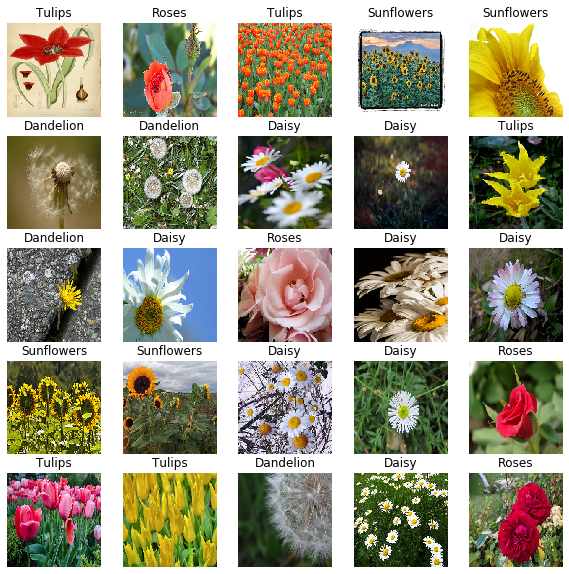

In [0]:
# 준비된 data set의 일부를 확인
show_batch(train_data_gen_cwd, CLASS_NAMES_cwd)
print()

## 2 `TensorFlow datasets` 사용하기

### 2.1 tf.keras.utils.get_file()   
# -- TF에서 제공되는 DataSet을 지정된 위치에서 읽어, colab에 압축 풀어 저장하기  
 -- DataSet Document https://www.tensorflow.org/datasets/catalog/overview 에서 URL 참조

In [0]:
import pathlib

# get_file : 알고 있는 url에서부터 파일을 가져와 untar ( 압축을 풀어줌 )해주면서 flower_photos라는 이름으로 저장. 그리고 그 path 리턴
data_dir = tf.keras.utils.get_file(
    origin='https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
    fname='flower_photos', untar=True)
data_dir_tf = pathlib.Path(data_dir)
print (data_dir_tf)

228818944/228813984 [==============================] - 2s 0us/step
/root/.keras/datasets/flower_photos


In [0]:
# 저장된 폴더 확인
!ls -al /root/.keras/datasets/flower_photos/

total 624
drwxr-x--- 7 270850 5000   4096 Feb 10  2016 .
drwxr-xr-x 3 root   root   4096 Dec 10 03:55 ..
drwx------ 2 270850 5000  36864 Feb 10  2016 daisy
drwx------ 2 270850 5000  49152 Feb 10  2016 dandelion
-rw-r----- 1 270850 5000 418049 Feb  9  2016 LICENSE.txt
drwx------ 2 270850 5000  36864 Feb 10  2016 roses
drwx------ 2 270850 5000  36864 Feb 10  2016 sunflowers
drwx------ 2 270850 5000  49152 Feb 10  2016 tulips


### 2.2 저장된 이미지를 `ImageDataGenerator()`로 준비하기 

Found 3670 images belonging to 5 classes.
CPU times: user 1.15 s, sys: 47.3 ms, total: 1.2 s
Wall time: 1.25 s


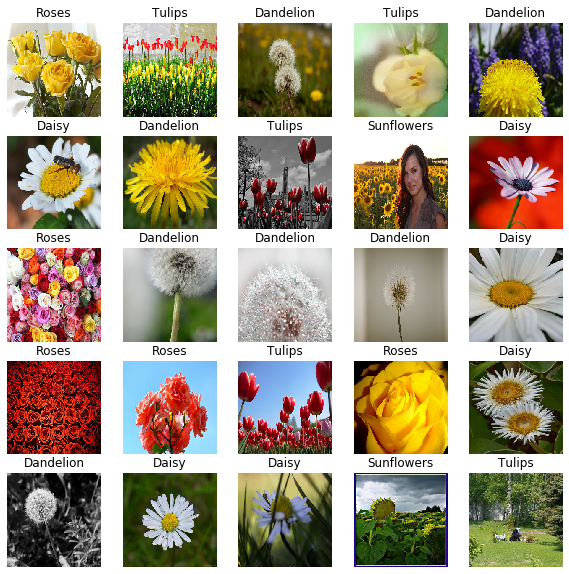

In [0]:
%%time
# check dir
image_count_tf, CLASS_NAMES_tf = check_dir(data_dir_tf) # check_dir은 param으로 "경로 텐서"를 받고, 그 경로에서의 "파일 수"와 "파일 리스트"를 리턴

# image generator for unziped directory 
# The 1./255 is to convert from uint8 to float32 in range [0,1].
image_generator_tf = (
    tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255))
# generate train dataset
train_data_gen_tf = image_generator_tf.flow_from_directory(
                      directory=str(data_dir_tf),
                      batch_size=320,
                      shuffle=True,
                      target_size=(224, 224),
                      classes = list(CLASS_NAMES_tf))
# check dataset
show_batch(train_data_gen_tf, CLASS_NAMES_tf)

## 3 `G-drive`상에 있는 폴더에서 직접 처리하기

Found 3670 images belonging to 5 classes.


(array([[[[0.34117648, 0.3137255 , 0.34117648],
          [0.34901962, 0.32156864, 0.34901962],
          [0.35686275, 0.33333334, 0.34901962],
          ...,
          [0.34509805, 0.32156864, 0.3372549 ],
          [0.34901962, 0.30980393, 0.34117648],
          [0.33333334, 0.30588236, 0.33333334]],
 
         [[0.34509805, 0.31764707, 0.34509805],
          [0.34901962, 0.32941177, 0.35686275],
          [0.35686275, 0.3372549 , 0.36078432],
          ...,
          [0.3529412 , 0.3254902 , 0.3529412 ],
          [0.36078432, 0.32156864, 0.3529412 ],
          [0.3372549 , 0.30980393, 0.3372549 ]],
 
         [[0.34901962, 0.32156864, 0.3529412 ],
          [0.34509805, 0.33333334, 0.36078432],
          [0.36078432, 0.34117648, 0.3647059 ],
          ...,
          [0.3647059 , 0.3254902 , 0.35686275],
          [0.3647059 , 0.32941177, 0.34901962],
          [0.3529412 , 0.3137255 , 0.34509805]],
 
         ...,
 
         [[0.20392159, 0.43529415, 0.08235294],
          [0.21568

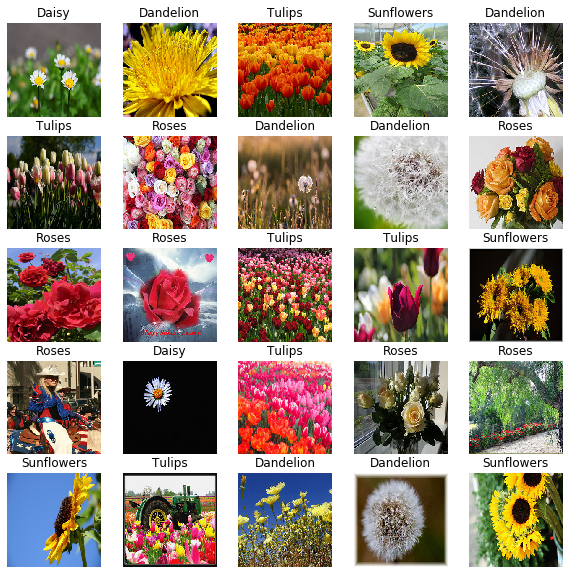

In [0]:
# G-drive에 "직접 접근"해서 처리함, 복사해오는 것 아님

# image path
data_dir_gd = pathlib.Path(
    '/content/drive/Shared drives/scsa_2019_e/z_data/flower_photos')
# check dir
image_count_gd, CLASS_NAMES_gd = check_dir(data_dir_gd)

# image generator for unziped directory 
# The 1./255 is to convert from uint8 to float32 in range [0,1].
image_generator_gd = (
    tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255))

# generate train dataset
train_data_gen_gd = image_generator_gd.flow_from_directory(
                    directory=str(data_dir_gd),
                    batch_size=320,
                    shuffle=True,
                    target_size=(224, 224),
                    classes = list(CLASS_NAMES_gd))
# check dataset
show_batch(train_data_gen_gd, CLASS_NAMES_gd)
print()